# ECS7024P Coursework 2

## Table of Contents
### Part 1: Introduction:
- 1.1 The Dataset
- 1.2 The Variables
- 1.3 Scenario
- 1.4 Loading Data

### Part 2: Requirements:
- 2.1 Data Preparation
- 2.2 Exploratory Analysis 
- 2.3 Regression Modelling 


##  1. Introduction

### 1.1 The Dataset

The original data comes from the [National Bridge Inspection](https://www.fhwa.dot.gov/bridge/nbi/ascii.cfm) section of the FHWA's web site. However, this dataset has been greatly simplified.

**The aim of the Bridge Inspection programme is to check on the state of bridges so that necessary repairs can be carried out. If this is not done, a bridge can fail. The dataset has information about the bridges and the condition given in the most recent inspection.**

* The FHWA's database covers the whole USA, but this dataset focuses exclusively on Texas. 
* While the FHWA dataset also includes tunnels and culverts, the Texas data used here includes only bridges. Culverts (drains under highways) have been removed..
* All of the bridges carry a highway, but what lies underneath (another road, waterway, or railway) varies.


### 1.2 The Variables

The original FHWA dataset has over 100 variables (Texas collects even more). This version have been simplifies to include both continuous and categorical variables. 


| Variable      |      Description             | Type | 
|:--------------|:-----------------------------|:------:|
|Structure_id   | Unique identifier of the bridge                  | String |
|District       | Highway district in Texas responsible for bridge | category | 
|Detour_Km      | Length of detour if bridge closed                | continuous |
|Toll           | Whether a toll is paid to use bridge             | category |
|Maintainer     | The authority responsible for maintenance        | category |
|Urban          | Whether the bridge is located in an urban or rural area   | category |
|Status         | The road class: interstate to local                       | category | 
|Year           | The year the bridge was built                             | continuous | 
|Lanes_on       | The number of lanes that run over the bridge              | continuous (or discrete) |
|Lanes_under    | The number of lanes that run under the bridge             | continuous (or discrete) |
|AverageDaily   | The average daily traffic (number of vehicles)            | continuous |
|Future_traffic | The estimated daily traffic in approx 20 years time       | continuous |
|Trucks_percent | The percent of traffic made up of 'trucks' (i.e. lorries) | continuous |
|Historic       | Whether the bridge is historic                            | category | 
|Service_under  | The (most important) service that runs under the bridge   | category |
|Material       | The dominant material the bridge is made from             | category |
|Design         | The design of the bridge                                  | category |
|Spans          | The number of spans the bridge has                        | category (or discrete) |
|Length         | The length of the bridge in metres                        | continuous |
|Width          | The width of the bridge in metres                         | continuous |
|Rated_load     | The rated max loading of bridge (in tonnes)               | continuous |
|Scour_rating   | Only for bridges over water: the 'scour' condition        | ordinal |
|Deck_rating    | The condition of the deck of the bridge                   | ordinal |
|Superstr_rating| The condition of the bridge superstructure                | ordinal |
|Substr_rating  | The condition of the bridge substructure (foundations)    | ordinal |

**Note on 'scour'**: For bridges over water, the flow can erode or weaken the bridge supports (piers). This process, called "scouring", is measured by the `Scour_rating`.

 
**Values of Categorical Variables** In the original data, the values of the categorical variables are represented as integers, with their meanings given in a data dictionary. In this dataset, these 'numeric codes' have been replaced with suitable names.

| Variable      |      Values            |
|:--------------|:-----------------------|
|District       | Each district has a unique number  |
|Toll           | Toll, Free                |
|Maintainer     | State, County, Town or City, Agency, Private, Railroad, Toll Authority, Military, Unknown |
|Urban          | Urban, Rural |
|Status         | Interstate, Arterial, Minor, Local |
|Historic       | Register, Possible, Unknown, Not historic |
|Service_under  | Other, Highway, Railroad, Pedestrian, Interchange, Building |
|Material       | Other, Concrete, Steel, Timber, Masonry |
|Design         | Other, Slab, Beam, Frame, Truss, Arch, Suspension, Movable, Tunnel, Culvert, Mixed |
|Scour_rating   | Unknown, Critical, Unstable, Stable, Protected, Dry, No waterway |
|Deck_rating    | *Rating*: NA, Excellent, Very Good, Good, Satisfactory, Fair, Poor, Serious, Critical, Failing, Failed |
|Superstr_rating| *Rating* |
|Substr_rating  | *Rating* |

### 1.3 Scenario

The Texas Department of Transportation aims to investigate how well specific variables can predict the current condition of bridges. The following variables are of interest: 

1. Age (derived from the `Year` variable)
2. Average Daily Traffic (`AverageDaily`)
3. Percentage of Trucks (`Trucks_percent`)
4. Material (`Material`)
5. Design (`Design`)

The current condition of bridges is derived from three variables `Deck_rating`, `Superstr_rating` and `Substr_rating` of the bridges. 
The department wishes to answer following questions:

**- How well can these variables predict the current condition of bridges?**

**- Which variables have the greatest influence on the current condition?**

The use of regression has been agreed in advance. 


### 1.4 Loading the Data

A 'type map' is used to set the appropriate data types for each variable. Non-numeric fields are represented as categorical variables: using type `category` gives the default behaviour (use each unique value as a category and categories are not ordered). However, for the ordinal variables (such as Ratings) must be declared with a suitable type explicitly.   


**Note**: The Introduction markdown and the code is adapted and modified from Notebook3 provided by Dr.William Marsh

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline

# The code below declares a catageorical type with categories in a specified order
# This can be used for an ordinal variable
rating_type = pd.CategoricalDtype(
    categories=['Failed', 'Failing', 'Critical', 'Serious', 'Poor', 'Fair', 
                'Satisfactory', 'Good', 'Very Good', 'Excellent', 'NA'], 
    ordered=True)

# This one is also for an ordinal variable, but with a slightly different set of values
scour_type = pd.CategoricalDtype(
    categories=['Unknown', 'Critical','Unstable', 'Stable', 'Protected', 'Dry', 'No waterway'], 
    ordered=True)

types_dict = { 'Structure_id': str, 'District':'category', 'Toll':'category', 
              'Maintainer':'category', 'Urban':'category', 'Status':'category', 
              'Historic':'category', 'Service_under':'category', 'Material':'category', 
              'Design':'category', 
              'Deck_rating':rating_type, 'Superstr_rating':rating_type, 'Substr_rating':rating_type, 
              'Scour_rating':scour_type}

bridges = pd.read_csv('tx19_bridges_sample.csv', dtype = types_dict, index_col = 'Structure_id')
display(bridges.head())

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200


##  2. Requirements

### 2.1: Data Preparation
In this section, the dataset is prepared by deriving new variables, simplifying categories, and addressing any outliers. 

#### **2.1.1 Deriving Age Variable**
Since the dataset lacks an `Age` variable, it is derived from the `Year` variable. The `Age` of each bridge is calculated by subtracting its construction year from the current year (2024).

**Assumptions**:
Bridges classified as historic or those over 100 years old are excluded to focus on more recent infrastructure and to avoid potential outliers in age. This assumption is based on the need for reliable, actionable insights relevant to modern bridge conditions.

After applying these filters, 33,680 bridges remain from the original 34,293 records, meaning only 1% of data was removed. This minor reduction ensures the dataset remains broadly representative for analysis.


In [3]:
this_year = 2024
bridges['Age'] = this_year - bridges['Year']

bridges_filtered_age = bridges[(bridges['Historic'].isin(['Not historic', 'Possible', 'Unknown'])) & (bridges['Age'] <= 100)]

print("Original data count:", len(bridges))
print("Filtered data count:", len(bridges_filtered_age))
display(bridges_filtered_age[['Historic', 'Age']].head())

Original data count: 34293
Filtered data count: 33680


,Historic,Age
Structure_id,,
000021521-00101,Not historic,19
000021521-00181,Not historic,19
000021521-TMP20,Not historic,12
000021525-00012,Not historic,74
000021580-00092,Not historic,20


#### **2.1.2 Simplifying Categories in Material and Design**

To reduce the number of categories in the `Material` and `Design` variables, very small categories were merged into broader groups, and assigned to new columns named `SimpMat` and `SimpDes`. For example:
- **Material**: Categories like `Masonry` and `Other` were merged into an **"Others"** category, due to their low frequency.

- **Design**: Similarly, categories such as `Movable`, `Suspension`, `Frame` and `Other` were merged into an **"Others"** category for the same purpose.

This approach retains the most common categories, allowing us to focus on significant material and design types without losing representativeness.
The distributions of `Material` and `Design` before and after simplification are shown below. The changes affect only a small proportion of the dataset, ensuring the core characteristics of these variables remain clear and representative for analysis.

In [4]:
# Variable 1: Material

#First, check distribution of Material
material_distr = bridges_filtered_age['Material'].value_counts()
print('The counts for each material type are:')
display(material_distr)

# Define new ordinal type for the simplified material
simp_material_type = pd.CategoricalDtype(categories=['Concrete','Steel','Timber','Others'])

#Create new dictionary mapping existing to new values 
simp_material_dict={'Concrete':'Concrete', 'Steel':'Steel', 'Timber':'Timber', 
                    'Other':'Others', 'Masonry':'Others'}

def simpMaterial(row):
    if row.Material in simp_material_dict:
        return simp_material_dict[row.Material]
    return row.Material

bridges_filtered_age = bridges_filtered_age.assign(SimpMat = bridges_filtered_age.apply(simpMaterial, axis=1))
bridges_filtered_age = bridges_filtered_age.astype({'SimpMat':simp_material_type})

simp_material_distr = bridges_filtered_age['SimpMat'].value_counts()
print('After simplifying, the counts for each material type are:')
display(simp_material_distr)

The counts for each material type are:


Material
Concrete    26764
Steel        6400
Timber        464
Other          47
Masonry         5
Name: count, dtype: int64

After simplifying, the counts for each material type are:


SimpMat
Concrete    26764
Steel        6400
Timber        464
Others         52
Name: count, dtype: int64

In [5]:
# Variable 2: Design

#First, check distribution of Design 
design_distr = bridges_filtered_age['Design'].value_counts()
print('The counts for each design used are:')
display(design_distr)

# Define new ordinal type for the simplified design
simp_design_type = pd.CategoricalDtype(categories=['Beam','Slab','Arch','Others'])

#Create new dictionary mapping existing to new values 
simp_design_dict={'Beam':'Beam', 'Slab':'Slab', 'Arch':'Arch', 'Other':'Others', 
                  'Frame':'Others', 'Truss':'Others', 'Movable':'Others', 'Suspension':'Others'}

def simpDesign(row):
    if row.Design in simp_design_dict:
        return simp_design_dict[row.Design]
    return row.Design 

bridges_filtered_age = bridges_filtered_age.assign(SimpDes = bridges_filtered_age.apply(simpDesign, axis=1))
bridges_filtered_age = bridges_filtered_age.astype({'SimpDes':simp_design_type})

simp_design_distr = bridges_filtered_age['SimpDes'].value_counts()
print('After simplifying, the counts for each design used are:')
display(simp_design_distr)

The counts for each design used are:


Design
Beam          28072
Slab           4181
Other          1237
Arch            111
Frame            52
Truss            16
Movable           8
Suspension        3
Name: count, dtype: int64

After simplifying, the counts for each design used are:


SimpDes
Beam      28072
Slab       4181
Others     1316
Arch        111
Name: count, dtype: int64

#### **2.1.3 Deriving the Current Condition Variable**
A new variable `Current_condition` is derieved from the combination of categorical ratings from three variables, `Deck_rating`, `Superstr_rating` and `Substr_rating`.

Each of the categorical values is converted into an integer score where:
- **0** represents a **Failed** condition,
- **1-9** represent increasing levels of condition quality (e.g., from **Failing** to **Excellent**).
- **None** represent when there is a NA score in the ratings

In [6]:
# Define a function to map categorial ratings to integer values
def integer_score(row):
    rating_int = {'Failed': 0, 'Failing': 1, 'Critical': 2, 'Serious': 3, 'Poor': 4, 
                  'Fair': 5, 'Satisfactory': 6, 'Good': 7, 'Very Good': 8, 'Excellent': 9, 'NA': None}

    deck_score = rating_int.get(row['Deck_rating'], None)
    superstr_score = rating_int.get(row['Superstr_rating'], None)
    substr_score = rating_int.get(row['Substr_rating'], None)
    
    # Sum the three scores 
    if None not in (deck_score, superstr_score, substr_score):
        return deck_score + superstr_score + substr_score
    else:
        return None

bridges_filtered_age['Current_condition'] = bridges_filtered_age.apply(integer_score, axis=1)
display(bridges_filtered_age[['Deck_rating', 'Superstr_rating', 'Substr_rating', 'Current_condition']].head())

,Deck_rating,Superstr_rating,Substr_rating,Current_condition
Structure_id,,,,
000021521-00101,Good,Very Good,Very Good,23.0
000021521-00181,Good,Good,Very Good,22.0
000021521-TMP20,Very Good,Very Good,Very Good,24.0
000021525-00012,Good,Good,Poor,18.0
000021580-00092,Good,Very Good,Very Good,23.0


### 2.2 Exploratory Analysis

In this section, the relationships between the five predictor variables (`Age`,`AverageDaily`,`Trucks_percent`, `Material` & `Design`) and the target variable (`Current_condition`) is being analysed, as well as the relationships among the predictor variables themselves. Both continuous and categorical variables are involved, so different techniques will be used to appropriately analyze these relationships.


#### **2.2.1 Relationship Between Predictors and Target Variable**

**(a) Continous Predictors vs Target**
- Any linear or non-linear relationship between continous predictors (`Age`, `Average Daily`, and `Trucks_percent`) and `Current_condition` are visualised using scatter plots.
- Correlation matrix is plotted and correlation coefficeints is used to quantify the strength and direction of between the relationships of predictors and target variable.

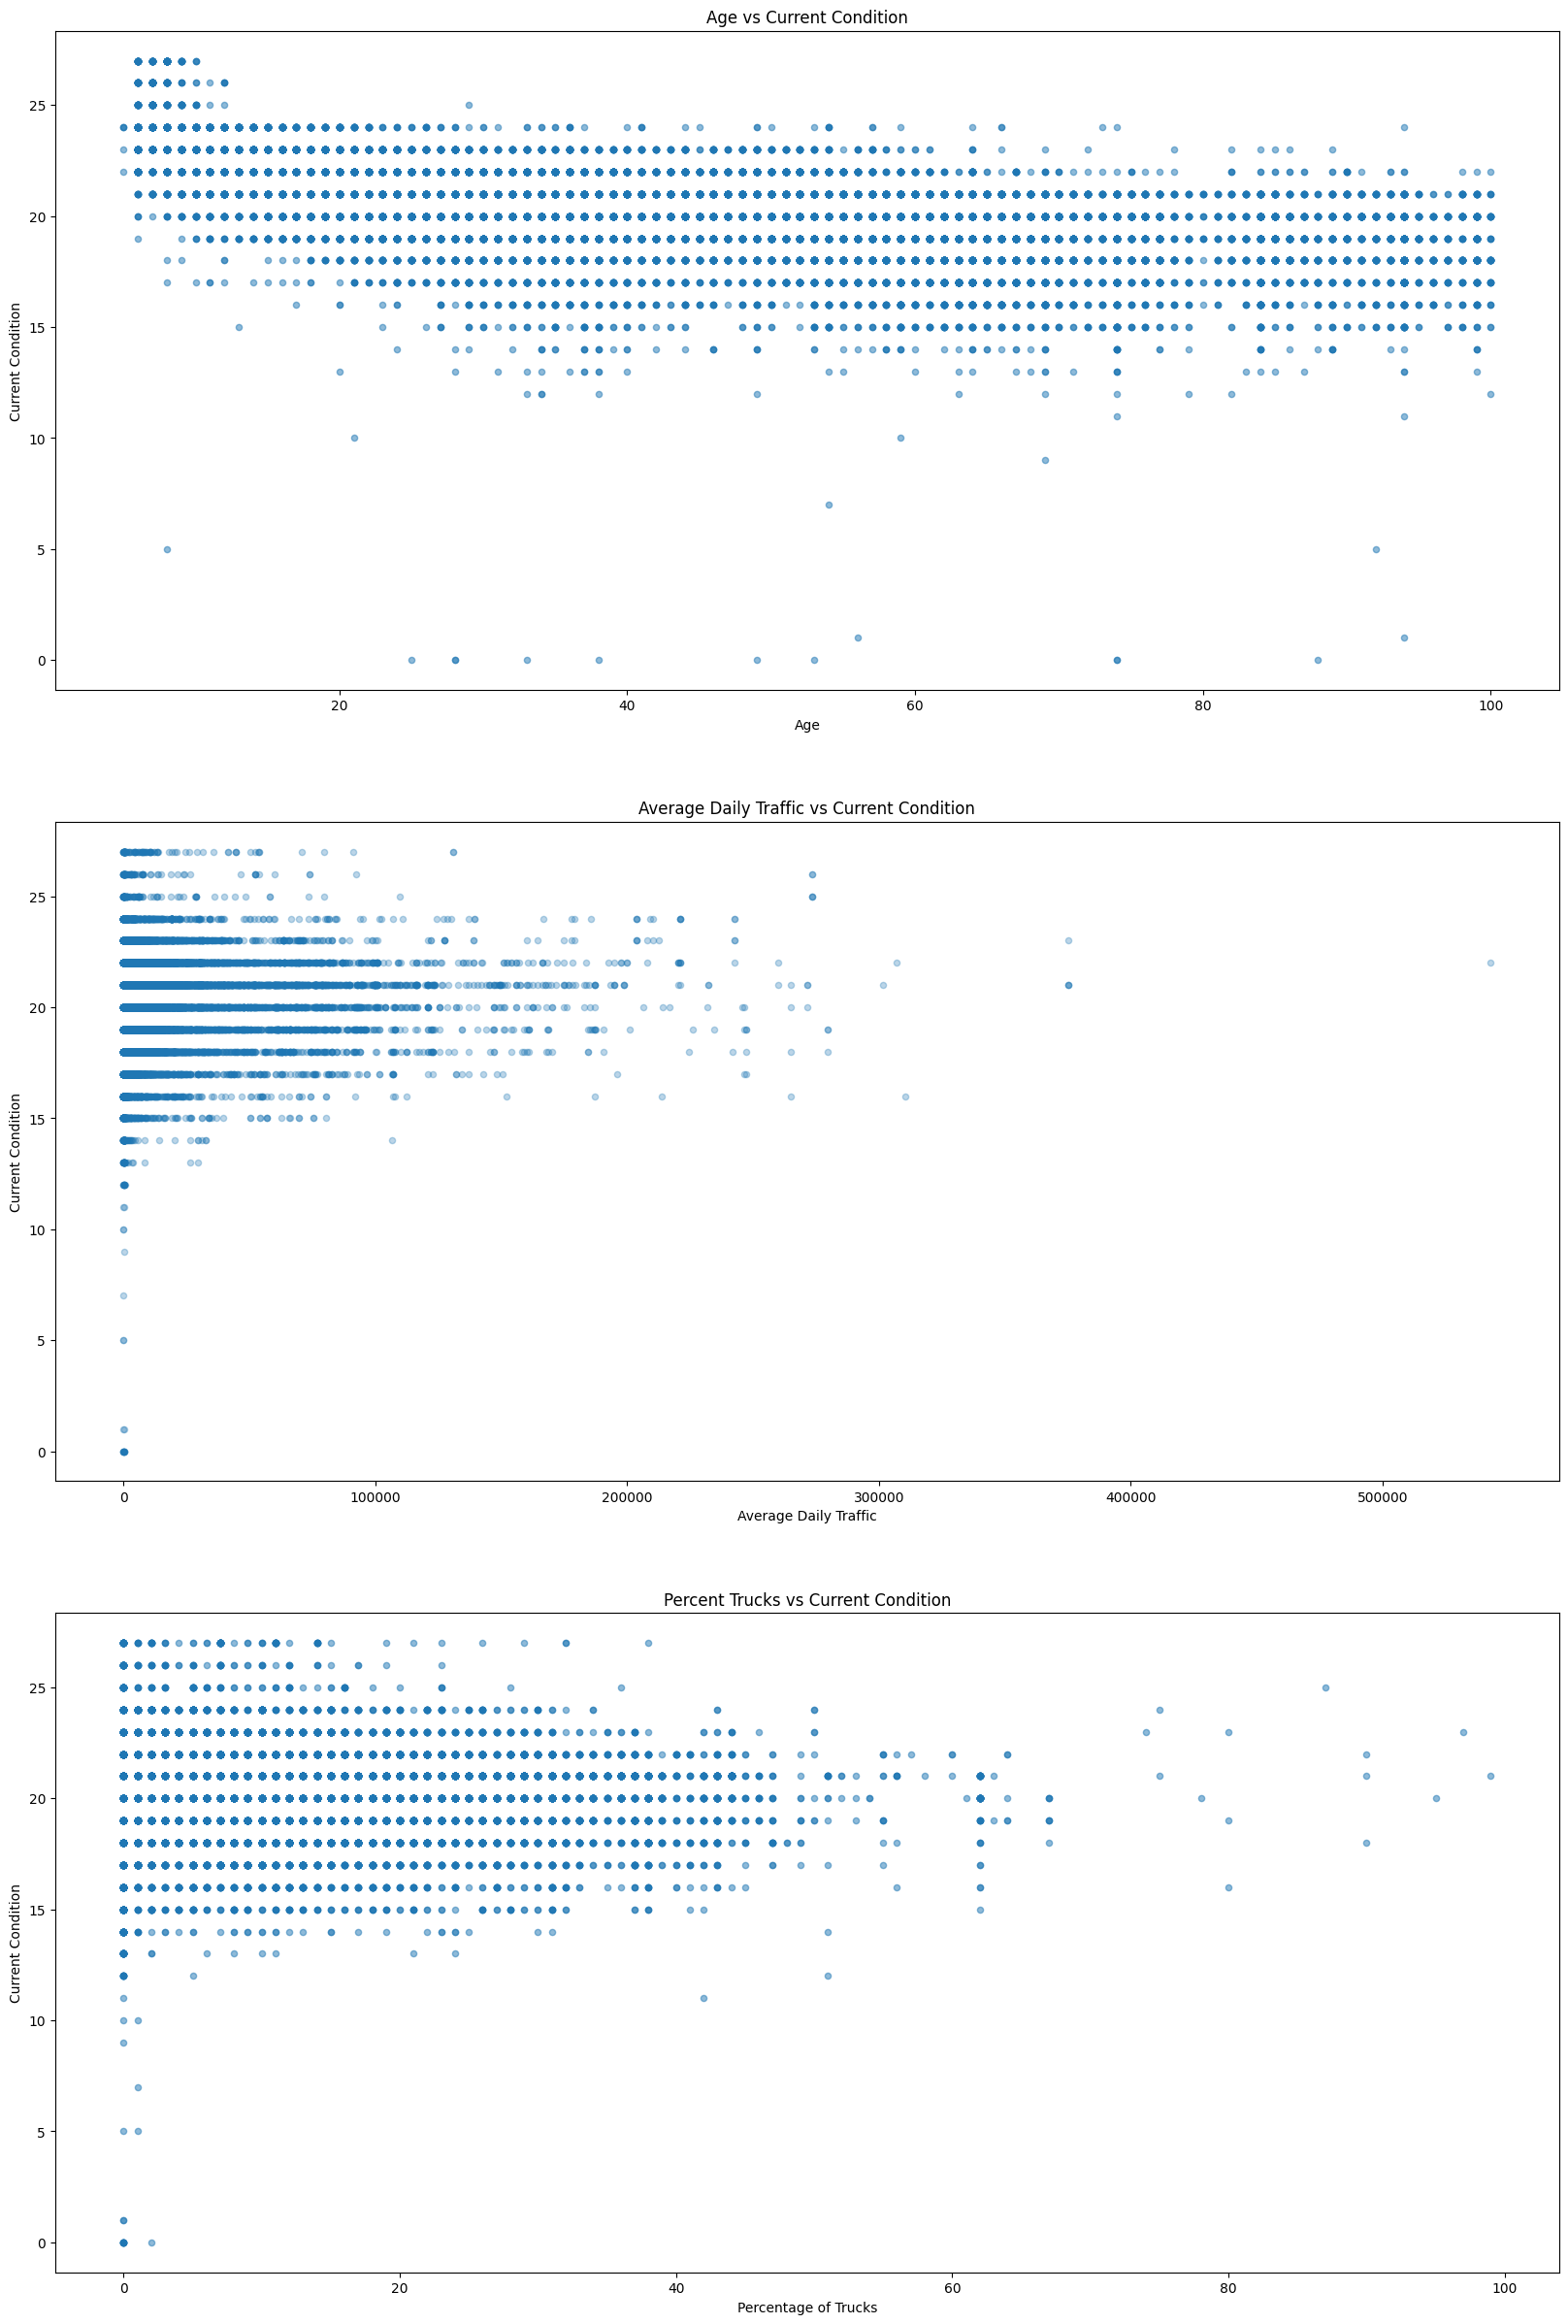

In [7]:

fig,((a1,a2,a3)) = plt.subplots(3, 1, figsize=(20, 30))

# Scatter Plot 1: Age vs Current Condition 
bridges_filtered_age.plot(kind='scatter', x='Age', y='Current_condition', alpha = 0.5, ax=a1)
a1.set_title('Age vs Current Condition')
a1.set_xlabel('Age')
a1.set_ylabel('Current Condition')

# Scatter Plot 2: Average Daily Traffic vs Current Condition 
bridges_filtered_age.plot(kind='scatter', x='AverageDaily', y='Current_condition', alpha = 0.3, ax=a2)
a2.set_title('Average Daily Traffic vs Current Condition')
a2.set_xlabel('Average Daily Traffic')
a2.set_ylabel('Current Condition')

# Scatter Plot 3: Percentage of Trucks vs Current Condition 
bridges_filtered_age.plot(kind='scatter', x='Trucks_percent', y='Current_condition', alpha= 0.5, ax=a3)
a3.set_title('Percent Trucks vs Current Condition')
a3.set_xlabel('Percentage of Trucks')
a3.set_ylabel('Current Condition')

plt.show()


,Age,AverageDaily,Trucks_percent,Current_condition
Age,1.000000,-0.049153,0.238289,-0.588520
AverageDaily,-0.049153,1.000000,0.022357,0.032369
Trucks_percent,0.238289,0.022357,1.000000,-0.051177
Current_condition,-0.588520,0.032369,-0.051177,1.000000


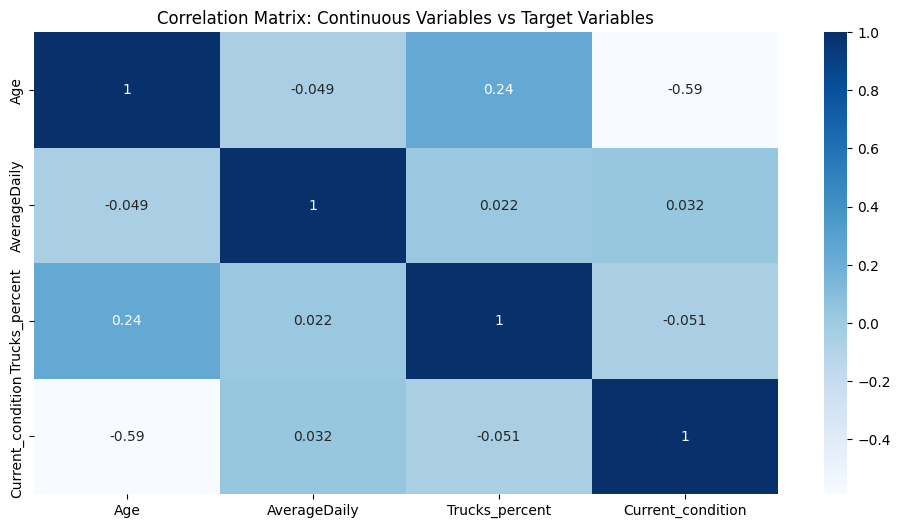

In [8]:
# Correlation matrix 
correlation_matrix = bridges_filtered_age[['Age', 'AverageDaily', 'Trucks_percent', 'Current_condition']].corr()
display(correlation_matrix)

# Heatmap 
plt.figure(figsize=(12, 6))
sns.heatmap (correlation_matrix, cmap='Blues', annot=True)
plt.title("Correlation Matrix: Continuous Variables vs Target Variables")
plt.show()

**(b) Categorical Predictors vs. Target**
- Box plot is used to show the distribution of target variable (`Current_condition`) across two simplified categorical variables (`SimpMat`, `SimpDes`).

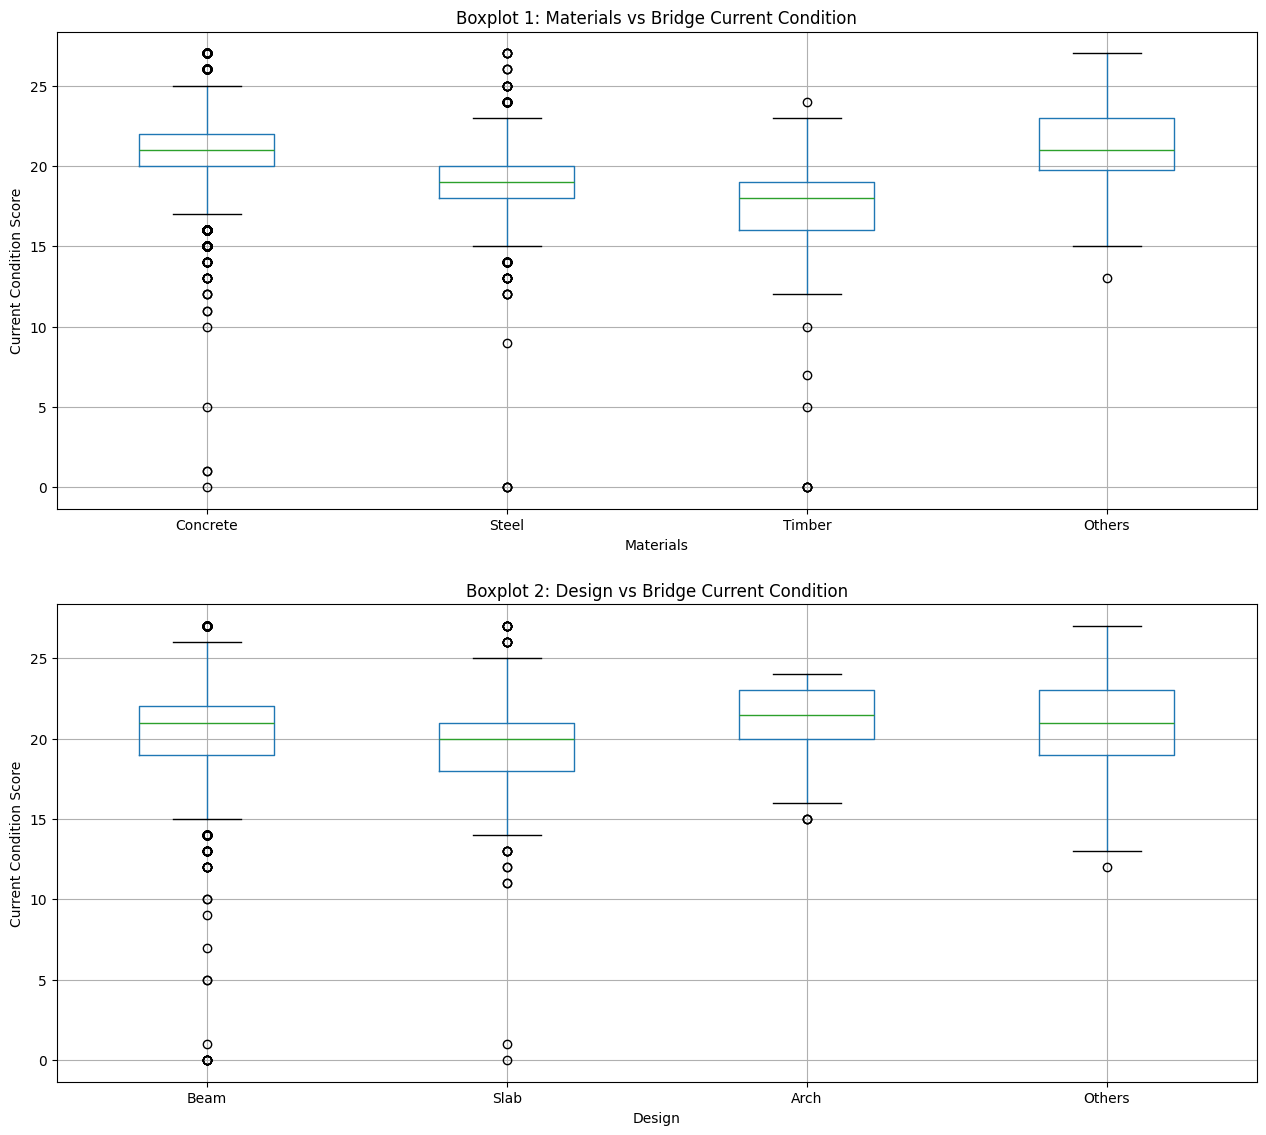

In [9]:
fig,(b1,b2) = plt.subplots(2,1, figsize=(15,14))

# Box plot 1: Material vs Current Condition
bridges_filtered_age.boxplot(column ='Current_condition', by='SimpMat', ax=b1)
b1.set_xlabel('Materials')
b1.set_ylabel('Current Condition Score')
b1.set_title('Boxplot 1: Materials vs Bridge Current Condition')


# Box plot 2: Design vs Current Condition
bridges_filtered_age.boxplot(column='Current_condition', by='SimpDes', ax=b2)
b2.set_xlabel('Design')
b2.set_ylabel('Current Condition Score')
b2.set_title('Boxplot 2: Design vs Bridge Current Condition')

plt.suptitle('')
plt.show()


#### **2.2.2 Relationship between Categorical Variables**
- A contingency table (cross-tabulation)  is used to find the relationship between two simplified categorical variables (`SimpMat` and `SimpDes`). The relationship is then visualised via heat map.

SimpDes,Beam,Slab,Arch,Others
SimpMat,,,,
Concrete,21560,4181,49,974
Steel,6048,0,51,301
Timber,464,0,0,0
Others,0,0,11,41


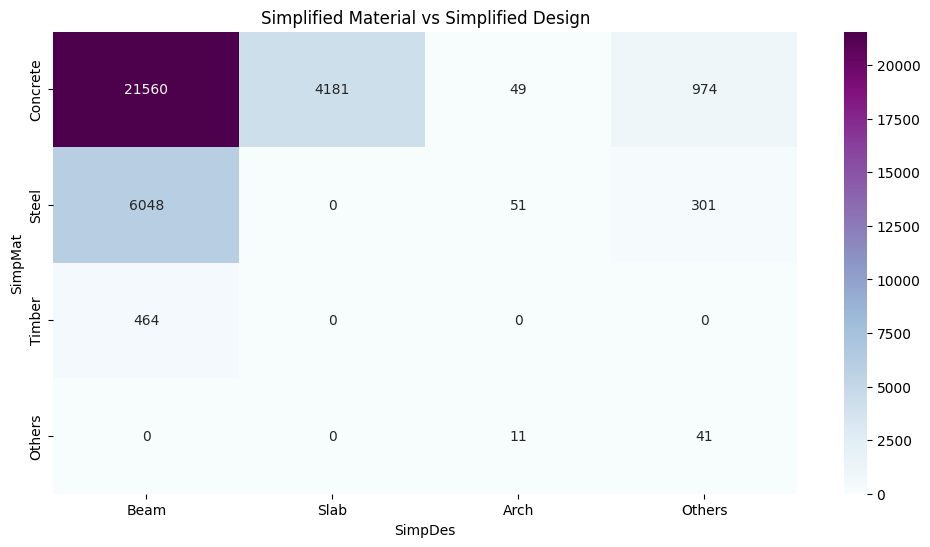

In [10]:
# Contigency Table
contingency_table = pd.crosstab(bridges_filtered_age['SimpMat'], bridges_filtered_age['SimpDes'])
display(contingency_table)

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, annot=True, cmap='BuPu', fmt='g')
plt.title('Simplified Material vs Simplified Design')
plt.show()


#### **2.2.3 Preliminary Analysis and Preliminary Conclusion**

After plotting the relationships between the predictors and the target variable, and the relationships between predictors, a preliminary analysis and preliminary conclusion is drawn to answer the following questions asked by the Texas Department of Transportation:

1. How well can the five predictor variables explain the variation in the current condition of bridges?
2. Which predictor variables have the greatest influence on the current condition of bridges?

**(a) Analysis on the relationship between five predictors and target variable**

**1. Age vs Current Condition:** 
- The scatter plot shows a negative linear relationship between age and the current condition of bridges, indicating that older bridges tend to be in worse condition. The correlation coefficient of -0.59, as shown in the correlation matrix, further indicates that this relationship is strong and negative correlated. 

**2. Average Daily Traffic vs Current Condition:**
- The scatter plot shows almost no linear relationship between average daily traffic and the current condition of bridges. The very weak positive correlation coefficient of 0.032 futher supports this, suggesting that average daily traffic is not a good variable for predicting the current condition of bridges, as the condition of bridges remains relatively stable across varying traffic levels.

**3. Percentage of Trucks vs Current Condition:** 
- Similar to average daily traffic, there is no significant linear relationship between the percentage of trucks and the current condition of bridges.The very weak negative correlation coefficient of -0.051, indicates that the percentage of trucks in the traffic is not a strong predictor of bridge condition as the bridges condition remains relatively stable across varying truck traffic.

**4. Material vs Current Condition:** 
- The box plot shows that bridges made of concrete and steel tend to have higher median scores, around 20, compared to timber, which has a median score below 20. Both concrete and steel show a narrow interquatile range, meaning the condition of most concrete and steel bridges is consistent and generally good. However, there are many outliers for concrete and steel, likely due to the large sample size (as shown in contigency table), meaning while most concrete and steel bridges are in good condition, some are in poor condition.
- Interestingly, bridges made from other materials have a median score of above 20. This may be due to the smaller number of bridges in this category, and possibly other influencing factors such as special designs or less frequent usage, contributing to their relatively better condition. 

**5. Design vs Current Condition:** 
- The box plot shows that bridges with beam design tend to have a median score of above 20, while slab designs has the lowest median score, below 20. Additionaly, arch and others deisgns have a median score of above 20 as well. This suggests that slab-designed bridges usually are in worse condition compared to other design. 

**6. Material vs Design** 
- The contigency table shows that concrete is the most frequently used material, followed by steel. Concrete bridges are predominantly used with beam design. Steel bridges are also commonly used with beam designs while timber bridges are exclusively designed with beam. In terms of design, beam is the most frequently used design, followed by slab. Beam design is not used with others materials, and slab designs are only used for concrete bridges. Arch deisgn is the least used design and span across various materials, including concrete, steel and others. 


**(b) Conclusion:** 

Among the five predictors, age is the best predictor and has the greatest influence on current condition of bridges, supported by the strong negative correlation of -0.59, indicating that the older the bridges, the worse the current bridge condition is.

Materials and design could be a useful predictor of current condition of bridges. For example, bridges made of concrete and those with beam designs tend to in better condition, as shown by their higher median score of current condition while being the most frequently used materials and design in building bridges. 

Average daily traffic and percent trucks are poor variables in predicting bridge condition, as both showed very weak correlations with current conditions, suggesting that both daily traffic volume and truck percentage have a very small impact on the bridge conditions.


### 2.3 Regression Modelling 
This section interprets the effect of the five predictor variables on the target variable using a linear regression model. Analysis, final conclusion and some suggestions for future analysis are also included in this section. 

#### **2.3.1  Data Preparation for Regression Analysis**

In preparation for regression analysis, the distributions of the continuous variables (`Age`, `AverageDaily`, `Trucks_percent`) and the target variable (`Current_condition`) are plotted. Additionally, a correlation matrix is displayed to check for relationships between the predictor variables. This is because according to the basic principles of regression analysis,:

- The dependent variable (target) is generally assumed to follow a normal distribution.

- There is no strict requirement for the predictor (independent) variables to follow a normal distribution. However, transforming skewed predictors may sometimes improve the model’s fit.

- The predictor variables should not be highly collinear.

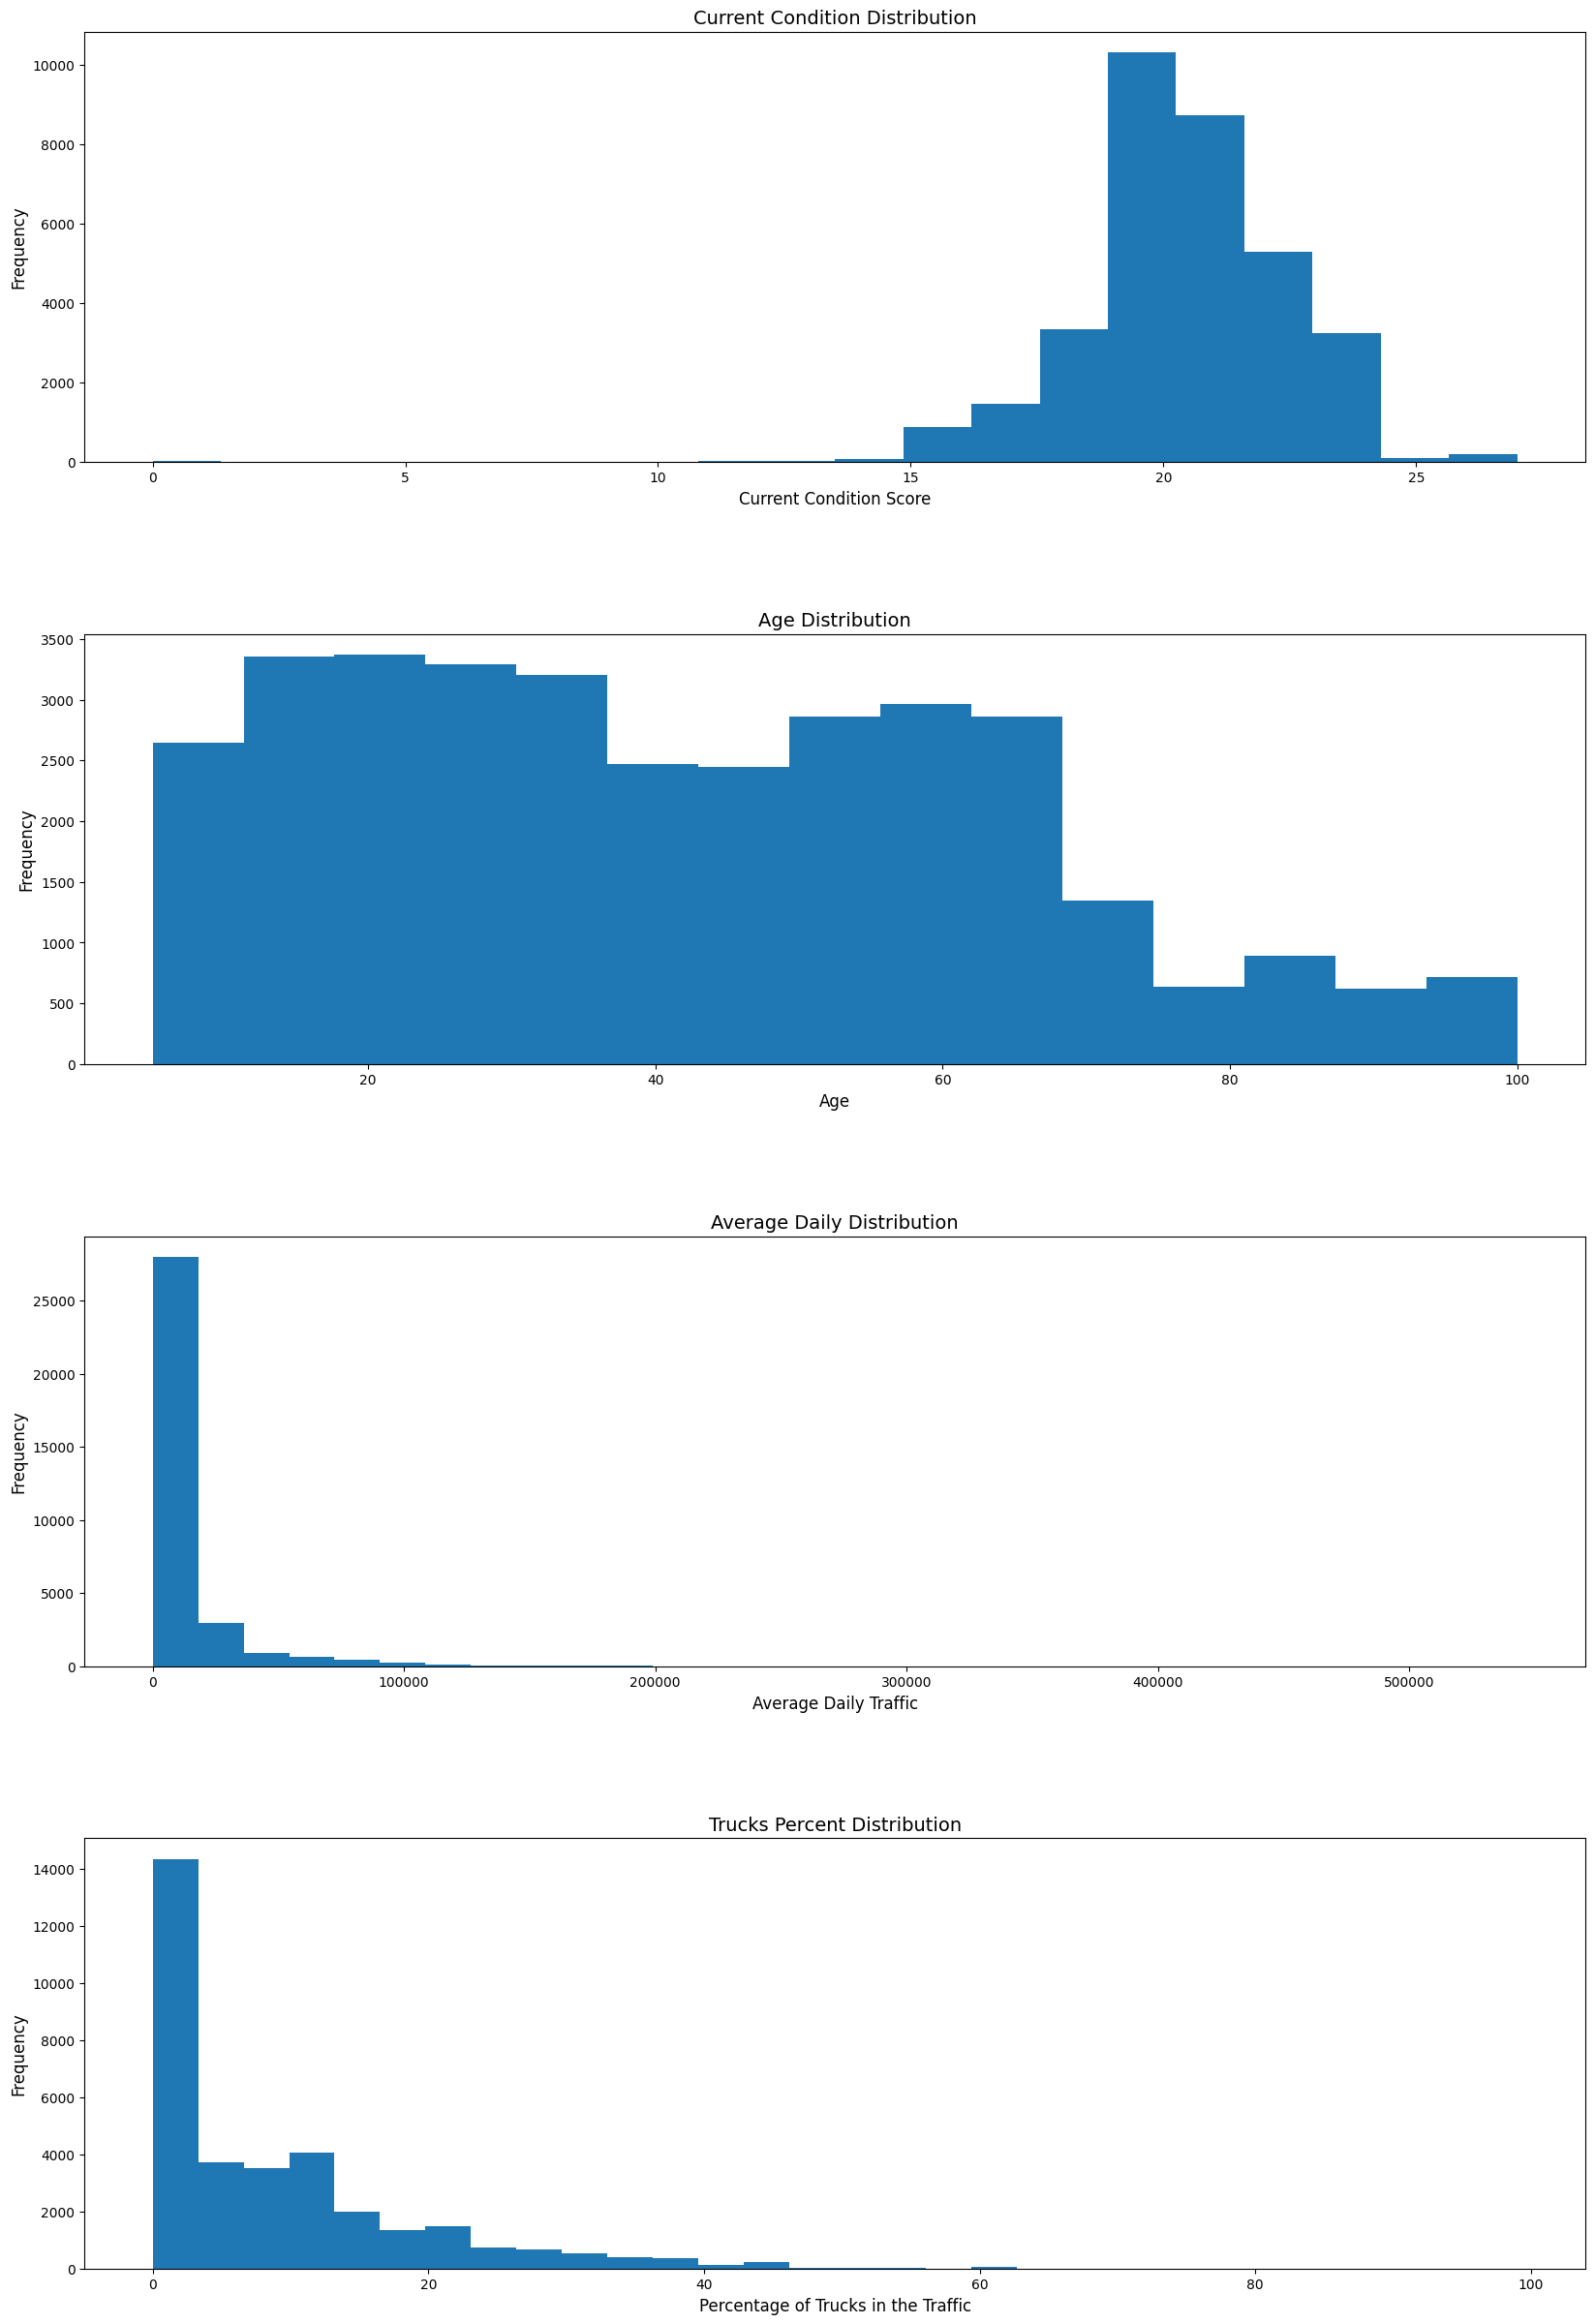

In [11]:
#Plot histogram 
fig,((c1,c2,c3,c4)) = plt.subplots(4, 1, figsize=(20, 30))
plt.subplots_adjust(hspace=0.4) 

# Histogram 1: Distribution of Current Condition
bridges_filtered_age['Current_condition'].plot(kind='hist',bins=20, ax=c1)
c1.set_title('Current Condition Distribution',fontsize=14)
c1.set_xlabel('Current Condition Score',fontsize=12)
c1.set_ylabel('Frequency',fontsize=12)

#Histogram 2: Distribution of Age
bridges_filtered_age['Age'].plot(kind='hist', bins=15, ax=c2)
c2.set_title('Age Distribution',fontsize=14)
c2.set_xlabel('Age',fontsize=12)
c2.set_ylabel('Frequency',fontsize=12)

#Histogram  3: Distribution of AverageDaily
bridges_filtered_age['AverageDaily'].plot(kind='hist', bins=30, ax=c3)
c3.set_title('Average Daily Distribution',fontsize=14)
c3.set_xlabel('Average Daily Traffic',fontsize=12)
c3.set_ylabel('Frequency',fontsize=12)


# Histogram 4: Distribution of Trucks Percent
bridges_filtered_age['Trucks_percent'].plot(kind='hist', bins=30, ax=c4)
c4.set_title('Trucks Percent Distribution',fontsize=14)
c4.set_xlabel('Percentage of Trucks in the Traffic',fontsize=12)
c4.set_ylabel('Frequency',fontsize=12)

plt.show()

**Comments on the distributions:** 

The distribution of the dependent variable (`Current_condition`) is approximately normal, satisfying the first condition of regression theory.
The distribution of `Age` shows a slight right skew, while both `AverageDaily` and `Trucks_percent` are heavily skewed to the right, indicating potential non-normality.

Despite the skewness in `AverageDaily` and `Trucks_percent`, transformations of these predictors will not be performed for the current analysis, as the results from the subsequent regression analysis are still meaningful and interpretable.

In [12]:
#Check for collinearity between predictor variables
display(correlation_matrix)

,Age,AverageDaily,Trucks_percent,Current_condition
Age,1.000000,-0.049153,0.238289,-0.588520
AverageDaily,-0.049153,1.000000,0.022357,0.032369
Trucks_percent,0.238289,0.022357,1.000000,-0.051177
Current_condition,-0.588520,0.032369,-0.051177,1.000000


**Examination of Collinearity Between Predictor Variables:**

Before moving forward with further regression analysis, potential collinearity between the continuous predictor variables (Age, AverageDaily, and Trucks_percent) are checked using their correlation coefficients.

The correlation between Age and AverageDaily is -0.049, indicating almost no relationship.The correlation between Age and Trucks_percent is 0.24, showing a weak positive relationship, far below the threshold for collinearity.The correlation between AverageDaily and Trucks_percent is only 0.022, reflecting a very weak positive relationship.

In conclusion, the correlations between the predictor variables are all well below the common threshold for multicollinearity (typically 0.7 or higher). Therefore, further regression analysis is performed as shown in the following sections.

#### **2.3.2  R² and Regression Coefficients**

In this section, we would calculate the R² and the regression coefficients for the regression model.

The R² value (also known as the coefficient of determination) explains how much of the variance in the target variable (Current Condition) can be explained by the predictor variables (`Age`, `AverageDaily`,`Trucks_percent`,`SimpMat`,`SimpDes`). It ranges from 0 to 1:
- R² = 1, means the model explains 100% of the variance in the target variable.
- R² = 0, means the model does not explain any of the variance.

The regression coefficients indicate the expected change (positive or negative) in the target variable for a one-unit change in each predictor variable, while keeping other predictors constant.

To ensure accurate regression calculations, all five predictor variables and the target variable are combined into a new DataFrame (`simpBridges_df`). Any rows with missing values in these variables are removed to allow for valid regression analysis, as missing would cause inconsistencies in calculating R² and regression coefficients.

The code below shows that there are 7 NA values in the target variable (`Current Condition`). Removing these 7 rows from the original 33680 records, leaves 33673 records, which is still highly representative of the dataset.

In [13]:
from sklearn.linear_model import LinearRegression

# Combine all five variables and target in a new df 
simpBridges_df = pd.DataFrame({'Age': bridges_filtered_age['Age'],
                               'AverageDaily': bridges_filtered_age['AverageDaily'],
                               'Trucks_percent': bridges_filtered_age['Trucks_percent'],
                               'SimpMat': bridges_filtered_age['SimpMat'],
                               'SimpDes': bridges_filtered_age['SimpDes'],
                               'Current_condition': bridges_filtered_age['Current_condition']})

print('Length of Bridges DataFrame before removing NA values:', len(simpBridges_df))

# Count NA values 
na_counts = simpBridges_df.isna().sum()
print('\nNA values per column:')
print(na_counts)

# Drop 
simpBridges_df = simpBridges_df.dropna()

print('\nLength of Bridges DataFrame after removing NA values:', len(simpBridges_df))
display(simpBridges_df.head())

Length of Bridges DataFrame before removing NA values: 33680

NA values per column:
Age                  0
AverageDaily         0
Trucks_percent       0
SimpMat              0
SimpDes              0
Current_condition    7
dtype: int64

Length of Bridges DataFrame after removing NA values: 33673


,Age,AverageDaily,Trucks_percent,SimpMat,SimpDes,Current_condition
Structure_id,,,,,,
000021521-00101,19,1,0.0,Concrete,Slab,23.0
000021521-00181,19,1,0.0,Concrete,Slab,22.0
000021521-TMP20,12,100,0.0,Concrete,Beam,24.0
000021525-00012,74,80,0.0,Timber,Beam,18.0
000021580-00092,20,150,4.0,Concrete,Beam,23.0


**(a) Continuous Variable vs Target Variable**

A linear regression model is used to explore the relationship between the continuous variables (`Age`, `AverageDaily`, and `Trucks_percent`) and target variable (`Current_condition`). The coefficient of determination (R²) and regression coefficient for each predictor is calculated.

In [14]:
# Continuous variables
# Define X and y variables 
X_continuous= np.column_stack((simpBridges_df['Age'], 
                               simpBridges_df['AverageDaily'], 
                               simpBridges_df['Trucks_percent']))
y = simpBridges_df['Current_condition']

# Fit 
reg = LinearRegression().fit(X_continuous, y)

# R² and Coefficients
print('The R² (coefficient of determination) is: %4.3f' % reg.score(X_continuous, y))

beta_Age, beta_AverageDaily, beta_Trucks_percent = reg.coef_
print('Estimated regression coefficient for Age is %4.2f' % beta_Age, 
      'change of bridge condition (score) per year.')
print('Estimated regression coefficient for Average Daily Traffic is %4.2f' % beta_AverageDaily, 
      'change of bridge condition (score) per vehicle.')
print('Estimated regression coefficient for Trucks Percent is %4.2f' % beta_Trucks_percent, 
      'change of bridge condition (score) per percent.')

The R² (coefficient of determination) is: 0.355
Estimated regression coefficient for Age is -0.05 change of bridge condition (score) per year.
Estimated regression coefficient for Average Daily Traffic is 0.00 change of bridge condition (score) per vehicle.
Estimated regression coefficient for Trucks Percent is 0.02 change of bridge condition (score) per percent.


Coefficients of linear regression have different units for different variables and some modifications are made when comparing them. For example, in this case, age has units of year, average daily traffic has units of vehicles, while trucks percent has units of percent. The modifications are : 

- Calculate the range (0.10 to 0.90 quantile) of each predictor and target variable. 
- Calculate the change in the target values as a percentage of its range that would result from the changing each of the predictor variables over its range.

After modifications, the three continuous variables now in percentage unit, can be compared and further analysis can be done.

In [15]:

# Find the range between 0.1 and 0.9 quantile for each predictor and the target variable
age_range = bridges_filtered_age['Age'].quantile(0.9) - bridges_filtered_age['Age'].quantile(0.1)
avgdaily_range = bridges_filtered_age['AverageDaily'].quantile(0.9) - bridges_filtered_age['AverageDaily'].quantile(0.1)
trucks_range = bridges_filtered_age['Trucks_percent'].quantile(0.9) - bridges_filtered_age['Trucks_percent'].quantile(0.1)
condition_range = bridges_filtered_age['Current_condition'].quantile(0.9) - bridges_filtered_age['Current_condition'].quantile(0.1)

# Calculate and print the percentage change in Current Condition due to each predictor over its range
print('The change in current condition (as a percent of its range), given by the age coefficient (over its range) is %4.1f%%'
      % (100 * (beta_Age * age_range) / condition_range))
print('The change in current condition (as a percent of its range), given by the average daily traffic coefficient (over its range) is %4.1f%%'
      % (100 * (beta_AverageDaily * avgdaily_range) / condition_range))
print('The change in current condition (as a percent of its range), given by the trucks percent coefficient (over its range) is %4.1f%%'
      % (100 * (beta_Trucks_percent * trucks_range) / condition_range))

The change in current condition (as a percent of its range), given by the age coefficient (over its range) is -61.8%
The change in current condition (as a percent of its range), given by the average daily traffic coefficient (over its range) is  0.0%
The change in current condition (as a percent of its range), given by the trucks percent coefficient (over its range) is  8.3%


**(b) Categorical Variables vs Target Variable**

A second linear regression model is used to explore the relationship between the categorical variables (`SimpMat` and `SimpDes`) and target variable (`Current_condition`). The coefficient of determination (R²) and regression coefficient for each predictor are also calculated.

In [16]:

# One-hot encode categorical variables (drop the first category)
mat_and_des_d = pd.get_dummies(simpBridges_df[['SimpMat', 'SimpDes']], drop_first=True)


# Update X variables 
X_combined = np.column_stack((simpBridges_df['Age'],
                              simpBridges_df['AverageDaily'],
                              simpBridges_df['Trucks_percent'],
                                mat_and_des_d['SimpMat_Steel'],
                                mat_and_des_d['SimpMat_Timber'],
                                mat_and_des_d['SimpMat_Others'],
                                mat_and_des_d['SimpDes_Slab'],
                                mat_and_des_d['SimpDes_Arch'], 
                                mat_and_des_d['SimpDes_Others']))


# Fit 
reg2 = LinearRegression().fit(X_combined, y)

# R² and Coefficients 
print('The R² coefficient of determination is %4.3f' % reg2.score(X_combined, y))

variable_names = ['Age', 'AverageDaily', 'Trucks_percent', 
                  'SimpMat_Steel', 'SimpMat_Timber', 'SimpMat_Others', 
                  'SimpDes_Slab', 'SimpDes_Arch', 'SimpDes_Others']

print('The regression coefficients of the variables are:')
for name, coef in zip(variable_names, reg2.coef_):
    print('%s: %.4f' % (name, coef))

The R² coefficient of determination is 0.453
The regression coefficients of the variables are:
Age: -0.0495
AverageDaily: -0.0000
Trucks_percent: 0.0054
SimpMat_Steel: -1.3714
SimpMat_Timber: -3.1955
SimpMat_Others: -0.1264
SimpDes_Slab: -0.0764
SimpDes_Arch: 1.0538
SimpDes_Others: -0.0973


#### **2.3.2 Histogram - Distribution of Residuals**

The residuals are the differences between the predicted values and the actual values of the target variable (`Curren_condition`). In this section, the distributions of residuals is plotted using a histogram.

Text(0, 0.5, 'Frequency')

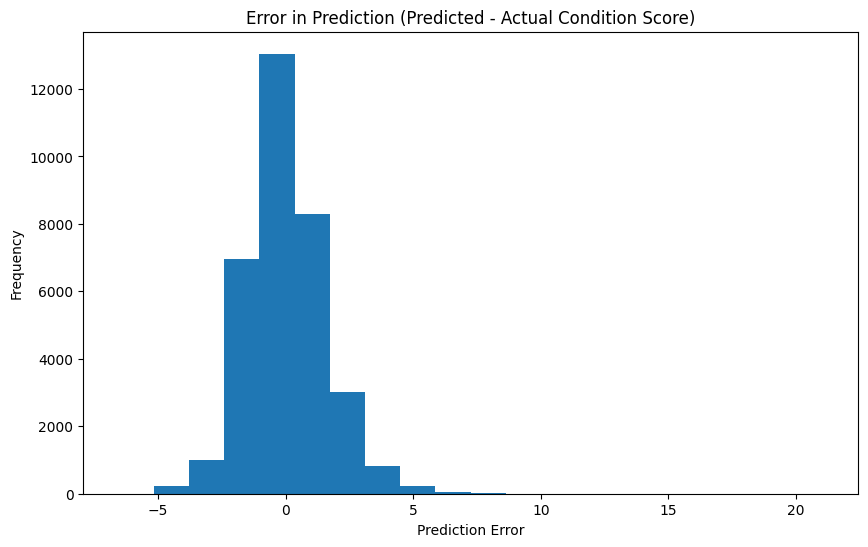

In [17]:
y_pred = reg.predict(X_continuous)
residuals = y_pred - y

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20)
plt.title('Error in Prediction (Predicted - Actual Condition Score)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')

#### **2.3.3 Final Conclusion**

In this section, a final conclusion is drawn to answer the following questions asked by the Texas Department of Transportation, and some suggestions for future analysis are also included.

1. How well can the five predictor variables explain the variation in the current condition of bridges?
2. Which predictor variables have the greatest influence on the current condition of bridges?


**1. R² (Coefficient of Determination):**

- In the first regression model (with only continous variables), the R² value is 0.355, suggesting that around 35.5% of the variance in the bridge condition score is explained by the continuous predictors (age, average daily traffic and percentage of trucks). 

- In the second regression model (with both continuous and categorical variables), the R² value increases to 0.453, indicating that 45.3% of the variance in the target variable (current condition) is now explained by all five predictors (age, average daily traffic, trucks percentage, simplified material and simplified design). This means that the inclusion of the categorical variables (`SimpMat` and `SimpDes`) has improved the model's ability to explain the bridge condition by around 10%, suggesting that both material type and design have an influence on the brigdes condition. 


**2. Comparing the Influence of Different Predictors Based on Regression Coefficient :**

**(a) Comparision Across Continuous Variables**

- Age: When comparing bridges based on age (from 10th to 90th percentile), the bridge condition score drops by 61.8% over that range. This indicates that older bridges are generally in much worse condition than the newer ones.

- Average Daily Traffic - The influence of average daily traffic on the bridge condition is practically zero, as shown by the 0.0% change in condition. This suggests that traffic volume do not have significant influence on the bridge condition.

- Trucks percent: The percentage of trucks in the traffic has a small but noticaeble influence on the bridge condition. Interestingly, when comparing trucks percentage across its range (from 10th to 90th percentile), the bridge condition score increases about 8.3% over that range. This indicates that bridges that handle more truck traffic are in slightly better condition, compared to those handle fewer trucks traffic.

**(b) Comparision of regression coefficients (both continuous and categorical)**
- After adding the categorical variables, the regression coefficient of the continuous variables (age and average daily traffic) show little to no change, suggesting the impact of both predictors on bridge condition remains consistent. However, the regression coefficient for the other continuous variable (trucks percentage) changes from 0.02 to 0.05. This suggest that the inclusion of categorical variables (material and design) increase the predictive power of `Trucks_percent` to bridge conditions, suggesting that truck percentage interacts with material and design in a way that influences bridge conditions more than initially estimated. 

- After adding categorical variables, new regression coefficients appear for the categorical variables, indicating that both variables significantly influence the bridge condition. For example, steel, timber and other materials all have negative coefficients (-1.37, -3.19, -0.13), suggesting these materials generally perform worse compared to the baseline material (concrete). Timber has the largest negative effect, with condition score 3.19 points lower than concrete, indicating that timber performs the worst in terms of materials.

- Regarding design, arches perform better than the baseline design (beam), with a condition score 1.05 point higher. In contrast, slabs and other designs have slight negative effects (-0.08, -0.09), suggesting they are generally worse than beam designs.

**3. Distribution of residuals (errors)**
- The histogram shows an approximately normal distribution of the residuals, with a mean around 0. , Most of the errors fall within a range of -5 to +5, indicating the model is slightly underestimated or overestimated the actual condition score in that range. The narrow spread of residuals suggest that the linear regression model is performing reasonably well and provide accurate predictions.


**4. Conclusion**
- In conclusion, after fitting into a linear regression model, age still remains of having the greatest influence on the current condition of bridges with the largest percentage change of -61.8% compared to the changes caused by other factors. This suggests that older bridges tend to be in worse condition. Material and design still play an important role that influence the bridge condition. Different from the preliminary conclusion, bridges built with concrete and designed with arches (instead concrete and beam) tend to be in a better condition compared to those made from other material and designs, such as timber and slab. Trucks percent show minimal influence on the bridges condition, and the influence increases slighlty when considering the materials and design used to build bridges, while average daily traffic shows almost no influence on the bridges condition. 

**5. Suggestions**
- Future analysis could explore potential non-linear relationship between the predictors and target as only linear relationship is analysed using correlation in this dataset. Besides that, future analysis could include additional predictors like climate conditions, geology, usage frequency, maintainence history, which may improve the model's predictive power. In addition, more advanced model could be used to capture the complex patterns and offer better predictive accuaracy in the data as linear regression is relatively simple. 